**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


**Check data files**

In [2]:
FOLDER_REG = "hic_intact_deep"

fdiry = file.path(FD_RES, "results", "region", FOLDER_REG, "summary")
for (fname in dir(fdiry)){cat(fname, "\n")}

peak.looped.astarr_a.bed.gz 
peak.looped.astarr_ab.bed.gz 
peak.looped.astarr_r.bed.gz 
peak.looped.atac.bed.gz 
peak.looped.crispri_growth.bed.gz 
peak.looped.crispri_hcrff.bed.gz 
peak.looped.encode_e2g_benchmark.bed.gz 
peak.looped.encode_e2g_prediction.bed.gz 
peak.looped.lmpra_a.bed.gz 
peak.looped.lmpra_ab.bed.gz 
peak.looped.lmpra_r.bed.gz 
peak.looped.tmpra_a.bed.gz 
peak.looped.tmpra_r.bed.gz 
peak.looped.wstarr_a.bed.gz 
peak.looped.wstarr_ab.bed.gz 
peak.looped.wstarr_r.bed.gz 
peak.summary.crispri_growth.dhs.active.tsv 
peak.summary.crispri_hcrff.casa.merge.tsv 
peak.summary.encode_e2g_benchmark.active.merge.tsv 
peak.summary.encode_e2g_prediction.active.merge.tsv 
peak.summary.enhancer_zscore_junke.concat.tsv 
peak.summary.KS91_K562_ASTARRseq_peak_macs_input.tsv 


## Import data

In [3]:
### get file paths
fdiry  = file.path(FD_RES, "results", "region", FOLDER_REG, "summary")
fname  = "peak.summary.*"
fglob  = file.path(fdiry, fname)
fpaths = Sys.glob(fglob)

### read tables
lst = lapply(fpaths, function(fpath){
    dat = read_tsv(fpath, show_col_types = FALSE)
    return(dat)
})

dat = bind_rows(lst)

### assign and show
dat_peak_summary_combine = dat
print(dim(dat))
head(dat)

[1] 1424119       6


Peak,Loop,Distance,Annotation,Label_Peak,Label_Loop
<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>
chr1:605550-605627,chr1:778000-779000,172374,CRISPRi,CRISPRi-Growth,Loop_A
chr1:826642-827902,chr1:868000-870000,40099,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:955000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:958000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:964946-965136,chr1:959000-960000,4947,CRISPRi,CRISPRi-Growth,Loop_A
chr1:995761-996190,chr1:1000000-1001000,3811,CRISPRi,CRISPRi-Growth,Loop_A


## Arrange and summary

In [4]:
dat = dat_peak_summary_combine

### summarize
dat = dat %>% 
    dplyr::group_by(Peak, Annotation, Label_Peak) %>%
    dplyr::summarise(Distance = min(Distance), .groups = "drop")
dat_peak_distance = dat

### filter
dat = dat %>% dplyr::filter(Distance == 0)
dat_peak_looped = dat

In [5]:
### init
dat = dat_peak_summary_combine
lst = split(dat, dat$Label_Peak)

###
lst = lapply(lst, function(dat){
    ###
    vec_txt_peak   = unique(dat$Peak)
    num_peak_total = length(vec_txt_peak)
    
    ###
    dat = dat %>% dplyr::filter(Distance == 0)
    vec_txt_peak    = unique(dat$Peak)
    num_peak_looped = length(vec_txt_peak)
    
    ###
    res = list(num_peak_looped, num_peak_total, num_peak_looped/num_peak_total)
    names(res) = c("Count", "Total", "Freq")
    return(res)
})

###
dat = bind_rows(lst, .id = "Assay")
dat = dat %>% 
    dplyr::mutate(
        Count_Label = ifelse(
            Total > 1000, 
            paste0(round(Total / 1000), "K"),
            Total
        )
    ) %>%
    dplyr::mutate(
        Assay_Label = paste0(Assay, "\n(", Count_Label, ")")
    )

dat_peak_isLoop = dat
dat

Assay,Count,Total,Freq,Count_Label,Assay_Label
<chr>,<int>,<int>,<dbl>,<chr>,<chr>
ASTARR_A,6106,9368,0.6517933,9K,ASTARR_A (9K)
ASTARR_AB,2095,3123,0.6708293,3K,ASTARR_AB (3K)
ASTARR_R,12235,17897,0.6836341,18K,ASTARR_R (18K)
ATAC,65084,230509,0.2823491,231K,ATAC (231K)
CRISPRi-Growth,3183,6242,0.5099327,6K,CRISPRi-Growth (6K)
CRISPRi-HCRFF,55,80,0.6875000,80,CRISPRi-HCRFF (80)
ENCODE-E2G_Benchmark,342,409,0.8361858,409,ENCODE-E2G_Benchmark (409)
ENCODE-E2G_Prediction,32449,51829,0.6260781,52K,ENCODE-E2G_Prediction (52K)
LMPRA_A,21085,40096,0.5258629,40K,LMPRA_A (40K)


## Bar plot

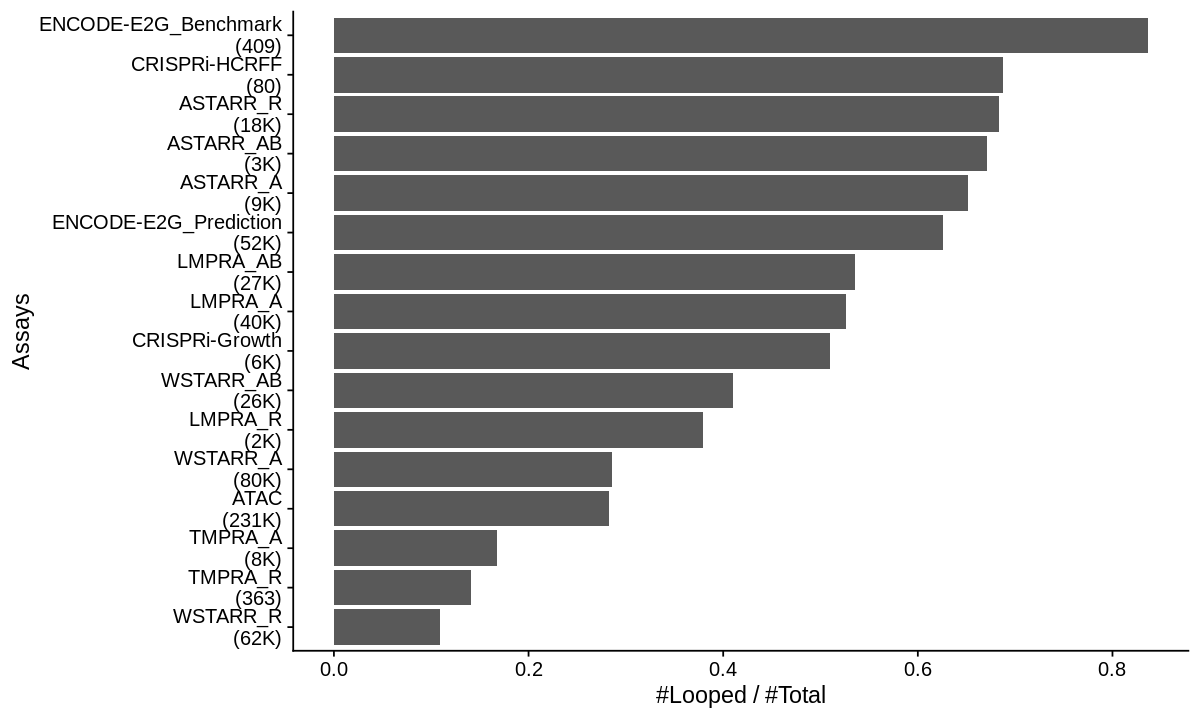

In [6]:
dat = dat_peak_isLoop
dat = dat %>% 
    dplyr::arrange(Freq) %>%
    dplyr::mutate(Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq, y=Assay_Label)) + 
    geom_col() + 
    labs(x="#Looped / #Total", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

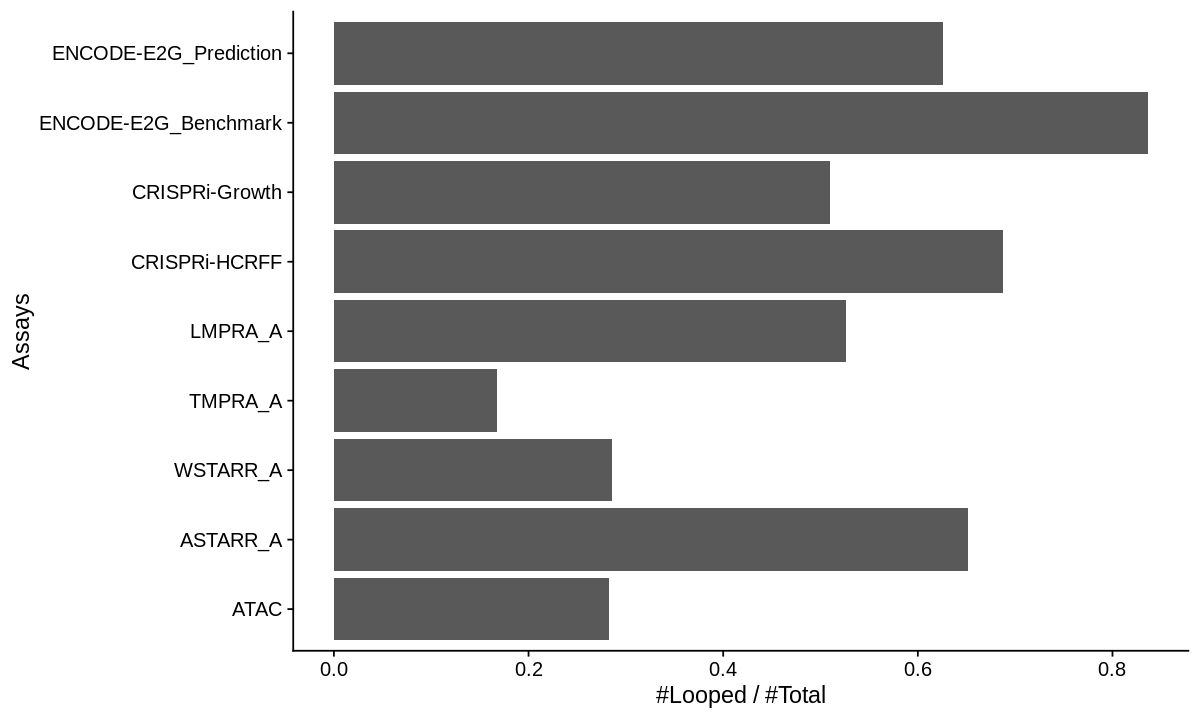

In [7]:
dat = dat_peak_isLoop
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% 
    dplyr::filter( Assay %in% vec) %>%
    dplyr::mutate( Assay = factor(Assay, levels=vec)) %>%
    dplyr::arrange(Assay) %>%
    dplyr::mutate( Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=Freq, y=Assay)) + 
    geom_col() + 
    labs(x="#Looped / #Total", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [ ]:
#fname = "figure_enhancer_loop_overlap.pdf"
#save_plot(fname, gpt)

## Plot distance

In [8]:
dat = dat_peak_summary_combine
table(dat$Label_Peak)


             ASTARR_A             ASTARR_AB              ASTARR_R 
                26172                  8748                 50084 
                 ATAC        CRISPRi-Growth         CRISPRi-HCRFF 
               569206                 17064                   280 
 ENCODE-E2G_Benchmark ENCODE-E2G_Prediction               LMPRA_A 
                 1286                146733                105612 
             LMPRA_AB               LMPRA_R               TMPRA_A 
                70772                  3895                 19704 
              TMPRA_R              WSTARR_A             WSTARR_AB 
                  866                195931                 66684 
             WSTARR_R 
               141082 

In [13]:
fun = function(vec){
    num = length(vec)
    num = round(num * 0.9)
    
    vec = sample(vec, size = num)
    res = mean(vec)
    return(res)
}

dat = dat_peak_summary_combine
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% dplyr::filter(Label_Peak %in% vec)
dat = dat %>% dplyr::filter(Distance < 10^4)

lst = split(dat$Distance, dat$Label_Peak)
lst = lapply(lst, function(vec){
    res = replicate(n=100, fun(vec))
    return(res)
})

lst = lapply(lst, function(vec){
    vec = vec / 1000
    res = quantile(vec, probs = c(0.025, 0.5, 0.975))
    names(res) = c("P1", "P2", "P3")
    return(res)
})

dat = bind_rows(lst, .id="Assay")

dat_peak_dist2Loop = dat
dat

Assay,P1,P2,P3
<chr>,<dbl>,<dbl>,<dbl>
ASTARR_A,0.7401695,0.7502334,0.7566508
ATAC,2.6897288,2.6930083,2.6974157
CRISPRi-Growth,1.2023530,1.2141473,1.2276070
CRISPRi-HCRFF,0.6622926,0.7286979,0.7746073
ENCODE-E2G_Benchmark,0.5281375,0.5626397,0.5929369
ENCODE-E2G_Prediction,0.9234142,0.9267274,0.9307854
LMPRA_A,1.1832632,1.1890163,1.1930831
TMPRA_A,3.0481204,3.0680436,3.0898002
WSTARR_A,1.7660224,1.7710727,1.7754922


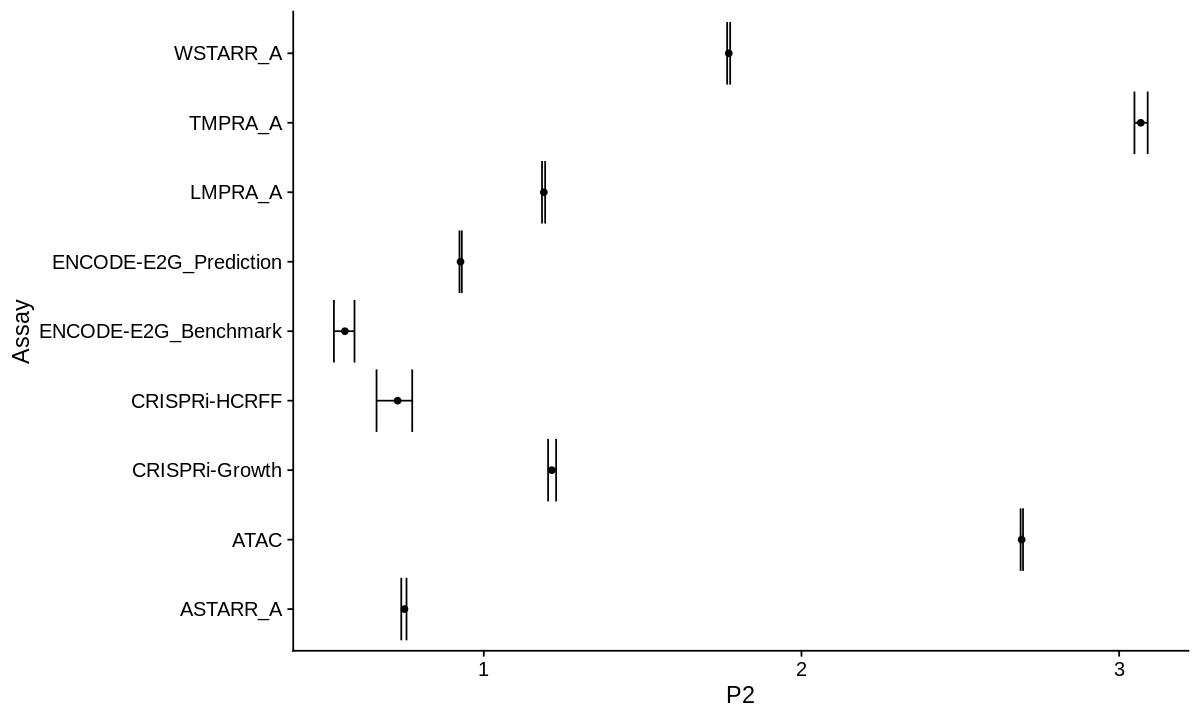

In [14]:
dat = dat_peak_dist2Loop

gpt = ggplot(dat, aes(x=P2, y=Assay)) + 
    geom_point() +
    geom_errorbar(aes(xmin=P1, xmax=P3)) +
    theme_cowplot()

print(gpt)

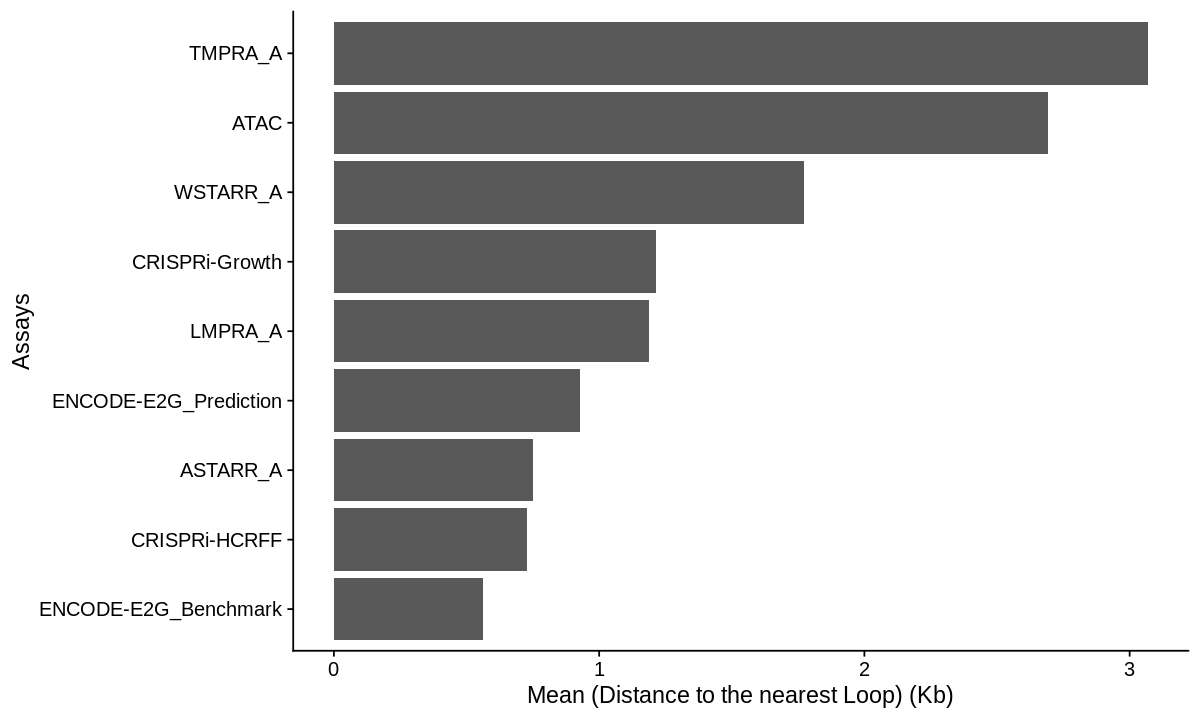

In [15]:
dat = dat_peak_dist2Loop
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% 
    dplyr::mutate( Assay = factor(Assay, levels=vec)) %>%
    dplyr::arrange(P2) %>%
    dplyr::mutate( Assay = factor(Assay, levels=Assay))

gpt = ggplot(dat, aes(x=P2, y=Assay)) + 
    geom_col() + 
    labs(x="Mean (Distance to the nearest Loop) (Kb)", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

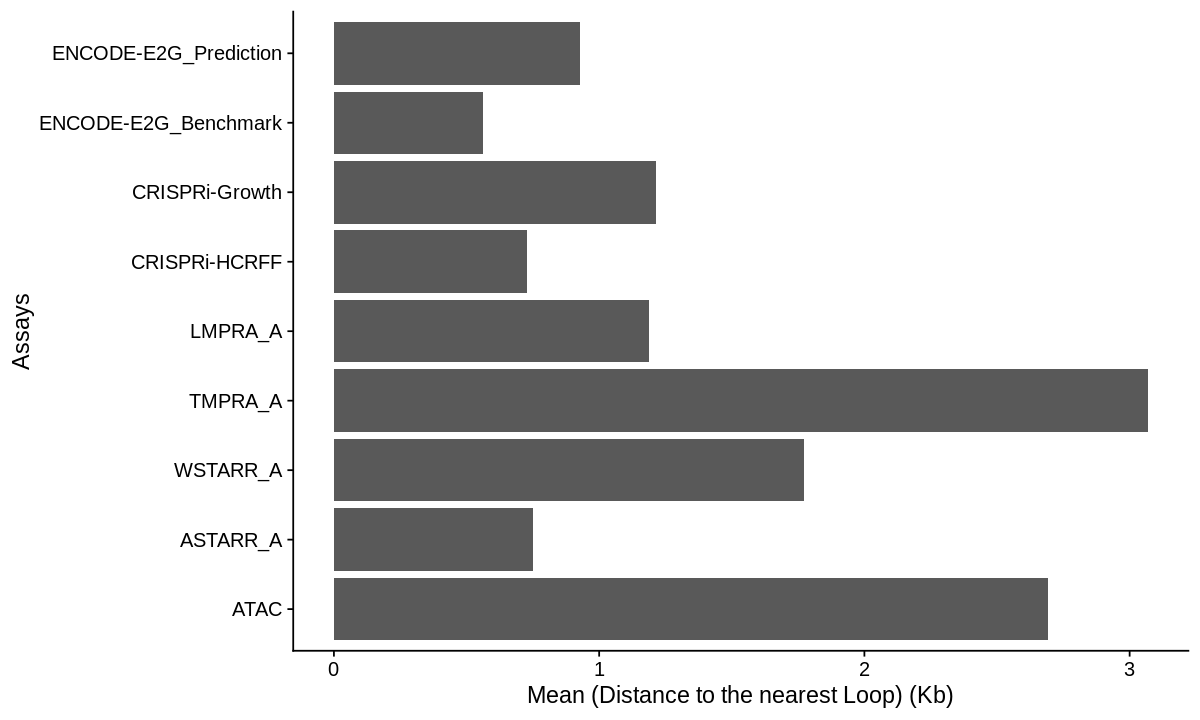

In [16]:
dat = dat_peak_dist2Loop
vec = c(
    "ATAC", 
    "ASTARR_A",
    "WSTARR_A",
    "TMPRA_A",
    "LMPRA_A",
    "CRISPRi-HCRFF",
    "CRISPRi-Growth",
    "ENCODE-E2G_Benchmark",
    "ENCODE-E2G_Prediction"
)
dat = dat %>% 
    dplyr::mutate( Assay = factor(Assay, levels=vec)) %>%
    dplyr::arrange(Assay) #%>%
    #dplyr::mutate( Assay_Label = factor(Assay_Label, levels=Assay_Label))

gpt = ggplot(dat, aes(x=P2, y=Assay)) + 
    geom_col() + 
    labs(x="Mean (Distance to the nearest Loop) (Kb)", y="Assays") +
    theme_cowplot()

options(repr.plot.height=6, repr.plot.width=10)
print(gpt)

In [94]:
fname = "figure_enhancer_loop_distance.pdf"
save_plot(fname, gpt)